# I used the weather data we clean with excel in class

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("CleanData.csv",header=0)
print(df)

# Cleaning the data

In [ ]:
try:
    #print(df['TOBS'].unique())
    #since TOBS data is filled with mostly bad or useless data we can drop the row
    del df['TOBS']
    #https://stackoverflow.com/questions/39217347/how-to-split-number-to-separate-columns-in-pandas-dataframe
    #Thanks Brandon for sending me the link
    # make string version of original column, call it 'DATES'
    df['DATES'] = df['DATE'].astype(str)
    # make the new columns using string indexing
    df['YEAR'] = df['DATES'].str[:4]
    df['MONTH'] = df['DATES'].str[4:6]
    df['DAY'] = df['DATES'].str[6:8]
    del df['DATE']
    del df['DATES']

    df['TAVG'] = df['TAVG'].replace(-9999,"")
    df['TAVG'] = pd.to_numeric(df['TAVG'],errors='coerce')
    df['PRCP'] = df['PRCP'].replace(-9999,"")
    df['PRCP'] = pd.to_numeric(df['PRCP'],errors='coerce')
    df['SNWD'] = df['SNWD'].replace(-9999,"")
    df['SNWD'] = pd.to_numeric(df['SNWD'],errors='coerce')
    df['SNOW'] = df['SNOW'].replace(-9999,"")
    df['SNOW'] = pd.to_numeric(df['SNOW'],errors='coerce')
    df['TMAX'] = df['TMAX'].replace(-9999,"")
    df['TMAX'] = pd.to_numeric(df['TMAX'],errors='coerce')
    df['TMIN'] = df['TMIN'].replace(-9999,"")
    df['TMIN'] = pd.to_numeric(df['TMIN'],errors='coerce')
    #research how to drop a column in Pandas.... hint you will use the word drop
except:
    print("Please run the code above")


# Precipitation analysis

- Bar graph of total precipitation in each year

In [ ]:
data=[]
unq = df.YEAR.unique()
unq.sort()
for i in unq:
    data.append([i,0])
years= df['YEAR']
amount= df['PRCP']
for i in range(len(years)):
    for j in range(len(data)):
        if years[i] == data[j][0]:
            data[j] = [data[j][0],data[j][1]+amount[i]]
            break
#print(data)

In [ ]:
newData = sorted(data, key=lambda l:l[1])
for i in range(len(data)):
    plt.bar(newData[i][0], newData[i][1])
plt.xticks(rotation = 90,fontsize=8)
plt.show()

 - Bar graph of total precipitation during the month of January overtime

In [ ]:
data=[]
unq = df.YEAR.unique()
unq.sort()
for i in unq:
    data.append([i,0])
years= df['YEAR']
months=df['MONTH']
amount= df['PRCP']
for i in range(len(years)):
    if months[i] == "01":
        for j in range(len(data)):
            if years[i] == data[j][0]:
                data[j] = [data[j][0],data[j][1]+amount[i]]
                break
print(data)

In [ ]:
newData = sorted(data, key=lambda l:l[1])
for i in range(len(data)):
    plt.bar(newData[i][0], newData[i][1])
plt.xticks(rotation = 90,fontsize=8)
plt.show()

 - How many days did we get both snow and rain?

In [ ]:
count=0
prcp = df['PRCP']
snow = df['SNOW']
for i in range(len(prcp)):
    if (snow[i]/10) < prcp[i]:
        count+=1
print(count)

 - What was the longest stretch of snow depth?

In [ ]:
listy=[]
dates=[]
count=0
snwd = df['SNWD']
year= df['YEAR']
month= df['MONTH']
day = df['DAY']
for i in range(len(snwd)):
    if snwd[i] != 0:
        count+=1
    else:
        if count!=0:
            listy.append(count)
            dates.append((year[i],month[i],day[i]))
        count=0
maxValue=0
maxIdx=0
for i in range(len(listy)):
    if maxValue<listy[i]:
        maxValue=listy[i]
        maxIdx=i
print('longest stretch of snow depth was', maxValue, 'ending at day', dates[maxIdx])

### Temperature analysis


 - Which day(s) was there the largest gap between the min and max temperature? 

In [ ]:
year=df['YEAR']
month=df['MONTH']
day=df['DAY']
tmax=df['TMAX']
tmin=df['TMIN']
gap=tmax-tmin
#print(gap)
values=[]
dates=[]
uni=gap.unique()
uni.sort()
maxValue=uni[-2]
for i in range(len(gap)):
    if gap[i]==maxValue:
        print('year',year[i],'month',month[i],'day',day[i])

- Over the entire file, what is the average rate of change of the average temperature in a day's time.  On average in between each day, how much did the temperture change throughout the year.  We don't need to know what direction, but the magnitude.

In [ ]:
df.dropna(subset=['TAVG'],inplace=True)
day=df['DAY']
tavg=df['TAVG']
listy=[]
for i in range(len(day)):
    try:
        listy.append(tavg[i]

 - Build a line graph comparrison of the min, max, and average temperatures over the span of the entire timeframe of the data.

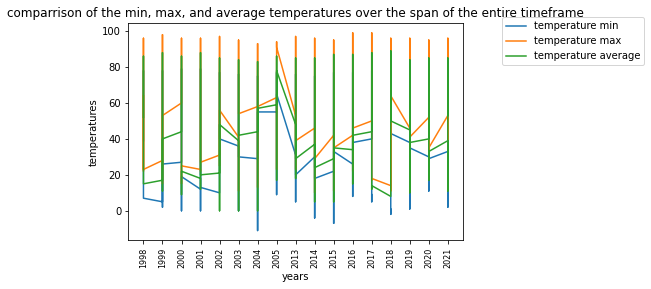

In [57]:
date=df['YEAR']
tavg=df['TAVG']
tmax=df['TMAX']
tmin=df['TMIN']
plt.plot(date,tmin,label='temperature min')
plt.plot(date,tmax,label='temperature max')
plt.plot(date,tavg,label='temperature average')
plt.title('comparrison of the min, max, and average temperatures over the span of the entire timeframe')
plt.xlabel('years')
plt.ylabel('temperatures')
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.xticks(rotation = 90,fontsize=8)
plt.show()